In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def one_hot(y):
    one_hot_y = np.zeros((y.size, int(y.max()) + 1))
    one_hot_y[np.arange(y.size), y.astype(int)] = 1 
    return one_hot_y.T
def sigmoid(z):
    l=1/(1+np.exp(-z))
    return l
def init_params(x,y):
    u=np.unique(y)
    np.random.seed(42)
    w=np.random.randn(len(u),len(x[0]))
    np.random.seed(42)
    b=np.random.randn(len(u),1)
    return w,b
def sigmoid_der(z):
    return z*(1-z)
def train_test_split(x,y,test_size):
    m,n=x.shape
    indices=np.arange(m)
   # np.random.seed(42)
    p=np.random.permutation(indices)
    x_test=x[p][:int(m*test_size)]
    y_test=y[p][:int(m*test_size)]
    x_train=x[p][int(m*test_size):]
    y_train=y[p][int(m*test_size):]
    return x_train,y_train,x_test,y_test

In [3]:
class logisticregression:
    def _init_(self,lr=None,epoch=None):
        self.lr=lr
        self.iter=epoch
    def fit(self,x,y):
        self.x=x
        self.y1=y
        self.y=one_hot(y)
        
    def cost(self,x,y,w,b):
        m,n=y.shape
        a=sigmoid(np.dot(w,x.T)+b)
        c=((a-y)**2)/(2*n)
        return c.sum()
    def grad(self,x,y,w,b):
        m,n=x.shape
        a=sigmoid(np.dot(w,x.T)+b)
        dc_dz=a-y
        dc_dw=np.dot(dc_dz,x)/m
        dc_db=(dc_dz).sum(1)/m
        return dc_dw,dc_db.reshape(-1,1)
    def grad_desc(self,batch):
        m,n=self.y.shape
        self.w,self.b=init_params(self.x,self.y1)
        c=n//batch
        #cost=[]
        for i in range(self.iter):
            for j in range(c):
                x=self.x[j::c]
                y=self.y[:,j::c]
                dw,db=model.grad(x,y,self.w,self.b)
                self.w-=self.lr*dw
                self.b-=self.lr*db
                #cp=model.cost(x,y,self.w,self.b)
                #cost.append(cp)
                if i%(self.iter//10)==0 and j==0:
                    print("epoch",i,"cost",model.cost(x,y,self.w,self.b))
                #self.costgraph=cost
    def predict(self,x_test):
        a=sigmoid(np.dot(self.w,x_test.T)+b)
        c=a.argmax(axis=0)
        self.pred=c
        return c
    def accuracy(self,y):
        return np.mean(self.pred==y)
    

In [4]:
df=pd.read_csv('Classification_train.csv')
y_train=df['label']
y_train=y_train.to_numpy()
x_train=df.drop(['label'],axis=1)
x_train=x_train.to_numpy()

In [5]:
unique_values, unique_indices = np.unique(y_train[:50], return_index=True)

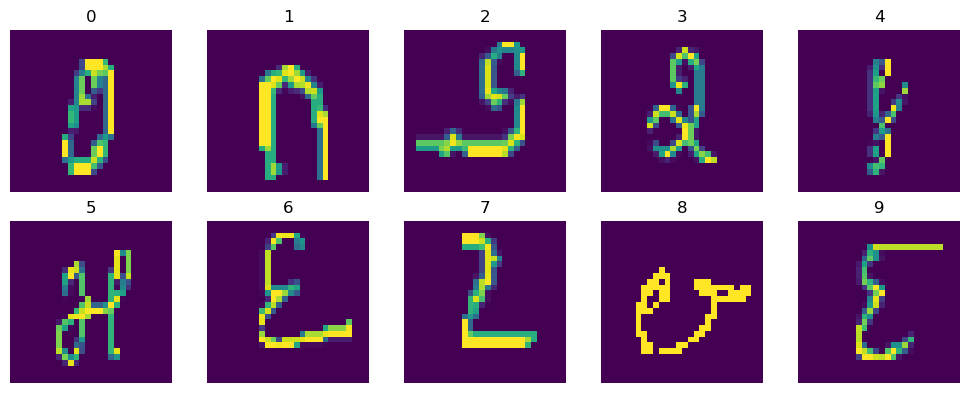

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
axes = axes.flatten()
m=0
for i in unique_indices:
    axes[m].imshow(x_train[i].reshape(28,28))  
    axes[m].set_title(f"{m}")
    axes[m].axis('off')
    m+=1

plt.tight_layout()
plt.show()

In [7]:
x_train1,y_train1,x_cv,y_cv=train_test_split(x_train/255,y_train,0.1)

In [8]:
model=logisticregression()

In [9]:
model.lr=3.2 
model.iter=100

In [10]:
model.fit(x_train1,y_train1)

In [11]:
model.grad_desc(128)

epoch 0 cost 0.513387370290519
epoch 10 cost 0.02648881257247169
epoch 20 cost 0.025185766118436176
epoch 30 cost 0.024847501000031982
epoch 40 cost 0.02450406193661746
epoch 50 cost 0.02412542204004416
epoch 60 cost 0.023724826960453485
epoch 70 cost 0.02332583326275365
epoch 80 cost 0.02294760239271608
epoch 90 cost 0.022600977566049542


In [12]:
p=sigmoid(np.dot(model.w,x_train1.T)+model.b)
predi=np.argmax(p,axis=0)

In [13]:
predi,y_train1

(array([9, 5, 5, ..., 6, 9, 3], dtype=int64),
 array([9, 5, 5, ..., 6, 9, 3], dtype=int64))

In [14]:
np.mean(y_train1==predi)

0.9817037037037037

In [15]:
q=sigmoid(np.dot(model.w,x_cv.T)+model.b)
predi1=np.argmax(q,axis=0)

In [16]:
np.mean(y_cv==predi1)

0.966

In [17]:
y_cv[:100],predi1[:100]

(array([0, 4, 2, 5, 8, 0, 6, 2, 5, 5, 2, 8, 6, 7, 4, 4, 8, 8, 1, 0, 9, 5,
        4, 0, 5, 5, 0, 9, 5, 3, 6, 6, 2, 5, 8, 1, 1, 0, 8, 9, 9, 8, 1, 3,
        6, 3, 1, 6, 6, 4, 5, 0, 0, 2, 0, 7, 5, 1, 4, 0, 3, 5, 3, 4, 6, 8,
        6, 4, 3, 6, 0, 3, 4, 4, 0, 1, 4, 1, 8, 4, 9, 9, 9, 9, 5, 7, 3, 0,
        3, 0, 8, 0, 0, 6, 3, 1, 4, 6, 7, 0], dtype=int64),
 array([0, 4, 2, 5, 8, 0, 6, 2, 5, 5, 2, 8, 6, 3, 4, 4, 8, 8, 1, 0, 9, 5,
        4, 0, 5, 5, 0, 9, 5, 3, 6, 6, 2, 4, 8, 1, 1, 0, 8, 9, 9, 8, 1, 7,
        6, 3, 1, 6, 6, 4, 5, 0, 0, 2, 0, 7, 5, 1, 4, 0, 3, 4, 3, 4, 6, 8,
        6, 4, 3, 6, 0, 0, 4, 4, 0, 1, 4, 1, 8, 4, 9, 9, 9, 9, 5, 7, 3, 0,
        3, 0, 8, 0, 0, 6, 3, 1, 4, 6, 7, 0], dtype=int64))

In [18]:
plt.plot(np.arange(100),model.costgraph[::210])

AttributeError: 'logisticregression' object has no attribute 'costgraph'

In [69]:
ot=pd.read_csv('Classification_test.csv')
ot

,ID,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,15795,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,860,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5390,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11964,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11284,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,11260,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,18563,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,634,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,10057,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
otid=ot['ID']
otx=ot.drop(['ID'],axis=1)
x_test=otx.to_numpy()/255

In [77]:
opred=sigmoid(np.dot(model.w,x_test.T)+model.b)
opred=predi1=np.argmax(opred,axis=0)
opreddf=pd.DataFrame({'Id': otid,'output': opred})


In [79]:
opreddf.to_csv('Classification_output_logistic_regression.csv')